## Gridworld

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Bellman Equation

$$V_{t+1}(s) = \max_a(r(s') + \gamma V_t(s'))$$

In [2]:
from enum import Enum
class Cell(Enum):
    EMPTY = 0
    OBSTACLE = -1
    REWARD = 1

class Action(Enum):
    RIGHT = 0
    UP = 1
    LEFT = 2
    DOWN = 3

    def to_numpy(self):
        return np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])[self.value]

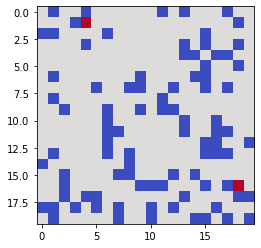

In [9]:
from dataclasses import dataclass
from typing import Tuple

@dataclass
class State:
    x: int
    y: int

    def to_numpy(self) -> np.ndarray:
        return np.array([self.x, self.y])

class GridWorld:
    def __init__(self, nx:int , ny:int):
        self.grid: np.ndarray = np.ones((nx,ny), dtype=int) * Cell.EMPTY.value

    def get_shape(self) -> Tuple[int]:
        return self.grid.shape
    
    def add_obstacle(self, x:int, y:int):
        self.grid[x,y] = Cell.OBSTACLE.value

    def add_reward(self, x:int, y:int, value:int = 1):
        self.grid[x,y] = Cell.REWARD.value * value

    def __repr__(self):
        return self.grid.__repr__()

    def plot(self):
        plt.imshow(np.clip(self.grid, -1, 1), cmap='coolwarm', interpolation='nearest')
        plt.show()

    def step(self, state:State, action:Action) -> Tuple[State, float]:
        x, y = state.to_numpy()

        if self.grid[x, y] != Cell.EMPTY.value:
            return state, 0

        next_x, next_y = state.to_numpy() + action.to_numpy()
        if next_x < 0 or next_x >= self.get_shape()[0]:
            return state, 0

        if next_y < 0 or next_y >= self.get_shape()[1]:
            return state, 0

        return State(next_x, next_y), self.grid[next_x, next_y]

        
nx, ny = 20, 20
world = GridWorld(nx, ny)

def sample_random_integer_points_in_2D(nx:int, ny:int, size:int):
    x = np.random.randint(0, nx, size)
    y = np.random.randint(0, ny, size)
    return np.array([x, y]).T


[world.add_obstacle(x, y) for x, y in sample_random_integer_points_in_2D(nx, ny, 100)]

rewards = [[1,4, 5], [16, 18, 10]]
[world.add_reward(*reward) for reward in rewards]

world.plot()

In [12]:
value_function = np.zeros((nx, ny))
n_iters = 100
gamma = 0.9

for i in range(n_iters):
    for x in range(nx):
        for y in range(ny):
            values = []
            for a in Action:
                next_state, reward = world.step(State(x, y), a)
                values.append(reward + gamma * value_function[next_state.x, next_state.y])
            
            value_function[x, y] = max(values)

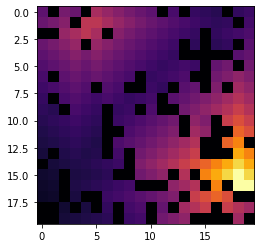

In [13]:
for x, y, r in rewards:
    value_function[x, y] = r

plt.imshow(value_function, cmap='inferno', interpolation='nearest')